<font size="+5">#08. Cluster Analysis con k-Means</font>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Accidentes de Coche** (columnas).
> - En cada uno de los **Estados de USA** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)
```

In [1]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
FL,17.9,3.759,5.191,16.468,16.826,1160.13,144.18
MN,9.6,2.208,2.784,8.448,8.448,777.18,133.35
OH,14.1,3.948,4.794,13.959,11.562,697.73,133.52
ND,23.9,5.497,10.038,23.661,20.554,688.75,109.72
OK,19.9,6.368,5.771,18.308,18.706,881.51,178.86
MD,12.5,4.250,4.000,8.875,12.375,1048.78,192.70
MS,17.6,2.640,5.456,1.760,17.600,896.07,155.77
MI,14.1,3.384,3.948,13.395,10.857,1110.61,152.26
IN,14.5,3.625,4.205,13.775,13.775,710.46,108.92


# Seleccionar Variables para el Modelo

> - Esta vez **SOLO seleccionamos variables explicativas**.
> - En este tipo de modelos no conocemos de antemano la variable a predecir.
> - Es decir, **NO tenemos variable objetivo** en los datos.
> - El algoritmo la irá deduciendo.

In [2]:
df.keys()

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

In [74]:
explanatory = df[['ins_losses','alcohol']].copy()

In [75]:
explanatory.sample(5)

,ins_losses,alcohol
abbrev,,
KY,137.13,4.922
HI,120.92,7.175
OH,133.52,4.794
NE,114.82,5.215
MT,85.15,9.416


# Seleccionar Número de Clusters

> - El objetivo del modelo es agrupar los estados.
> - Si son similares según las características.
> - Tenemos que especificar el Número de Grupos/Clústers al modelo.
> - Al visualizar los datos, **¿cuántos grupos?** `n_clusters`

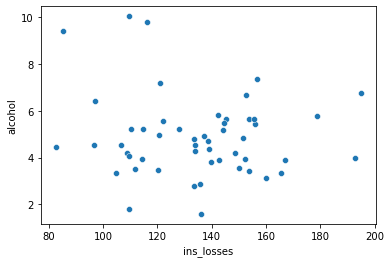

In [76]:
sns.scatterplot(x = 'ins_losses', y= 'alcohol' , data =df);

# Modelo de k-Means `KMeans()`

> - El objetivo final es ver el grupo al que pertenece cada Estado, cada observación.
> - Por tanto, la fórmula matemática calculará el grupo.

## Entrenar Modelo

> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [77]:
from sklearn.cluster import KMeans

In [78]:
model = KMeans(n_clusters = 3, verbose=1)

In [79]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 1}

In [80]:
model.fit(X = explanatory)

Initialization complete
Iteration 0, inertia 6458.885525999996
Iteration 1, inertia 5560.226770514285
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 10724.141513999995
Iteration 1, inertia 8560.661088372983
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8510.915006000003
Iteration 1, inertia 6411.025596402353
Iteration 2, inertia 6136.899226970833
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7119.129081999998
Iteration 1, inertia 5560.226770514285
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6133.375745999998
Iteration 1, inertia 5560.226770514285
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6085.278425999999
Iteration 1, inertia 5763.942393138155
Iteration 2, inertia 5634.28474348668
Iteration 3, inertia 5395.276336774823
Iteration 4, inertia 5321.654563079344
It

KMeans(n_clusters=3, verbose=1)

## Predicciones con el Modelo

> - `model.predict()`
> - Si ejecutamos `model.labels_`, obtendríamos lo mismo que `model.predict()`.
> - Es decir, el **grupo** al que pertenece cada observación.

In [81]:
dfsel = df[['ins_losses', 'alcohol']].copy()

In [82]:
dfsel['Cluster'] = model.predict(X = explanatory)

In [83]:
dfsel

,ins_losses,alcohol,Cluster
abbrev,,,
AL,145.08,5.640,2
AK,133.93,4.525,2
AZ,110.35,5.208,0
AR,142.39,5.824,2
CA,165.63,3.360,1
CO,139.91,3.808,2
CT,167.02,3.888,1
DE,151.48,4.860,2
DC,136.05,1.593,2


## Visualización del Modelo

> - El modelo se representa **coloreando** las observaciones según el grupo.
> - Y colocando los **centroides** `model.cluster_centers_`.

In [84]:
import matplotlib.pyplot as plt

(0.0, 200.0)

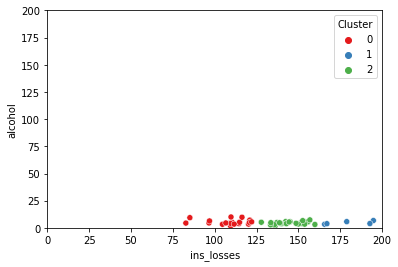

In [85]:
sns.scatterplot(x='ins_losses', y='alcohol', hue= 'Cluster', data=dfsel, palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)

## Interpretación del Modelo

> ¿Crees que el modelo tiene sentido?
> ¿Qué **variable es más importante** para determinar el grupo?

# Explicación Algoritmo k-Means

> - En el **siguiente vídeo** obtendrás una explicación del modelo.
> - Tras verlo, deberás entender que se calculan distancias.
> - Por tanto, el fallo del modelo está en que las variables **no son comparables**.
> - https://www.youtube.com/watch?v=4b5d3muPQmA

# Escalar Variables

> Es lo mismo incrementar 1 kilogramo de peso, que 1 metro de altura?
> - Rotundamente **NO**.
> - Y ahí está el fallo.
> Entonces, ¿cómo hacemos que peso y altura sean **comparables**?
> - Escalando las variables.

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
scaler.fit(X=explanatory)

MinMaxScaler()

In [89]:
scaler.transform(X=explanatory)

array([[0.55636883, 0.47921847],
       [0.45684192, 0.34718769],
       [0.24636258, 0.42806394],
       [0.5323574 , 0.50100651],
       [0.73980184, 0.20923623],
       [0.51022048, 0.26228538],
       [0.75220923, 0.27175844],
       [0.61349638, 0.38685613],
       [0.47576542, 0.        ],
       [0.54833527, 0.42605092],
       [0.53601714, 0.2731794 ],
       [0.34071231, 0.66098283],
       [0.        , 0.33676732],
       [0.50343658, 0.32670219],
       [0.23359814, 0.30929544],
       [0.28313845, 0.27613973],
       [0.45568151, 0.31722913],
       [0.48540569, 0.39419775],
       [1.        , 0.61243339],
       [0.12335981, 0.34777975],
       [0.98143354, 0.28502072],
       [0.47201642, 0.15121374],
       [0.62045881, 0.27886323],
       [0.45166473, 0.1410302 ],
       [0.6517897 , 0.45743043],
       [0.55074534, 0.45956187],
       [0.02142283, 0.92634695],
       [0.28626261, 0.42889284],
       [0.49950906, 0.36838366],
       [0.33437472, 0.22344583],
       [0.

In [90]:
import pandas as pd

In [91]:
dfnorm = pd.DataFrame(scaler.fit_transform(X=explanatory), columns=explanatory.columns)
dfnorm.head()

,ins_losses,alcohol
0,0.556369,0.479218
1,0.456842,0.347188
2,0.246363,0.428064
3,0.532357,0.501007
4,0.739802,0.209236


# Modelo de k-Means en Python con Datos Estandarizados

> - Ejecutamos los mismos comandos que antes
> - con la salvedad de **usar los datos escalados**.

## Entrenar Modelo

> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [92]:
modelnorm = KMeans(n_clusters = 3, verbose=1)

In [93]:
modelnorm.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 1}

In [94]:
modelnorm.fit(X = dfnorm)

Initialization complete
Iteration 0, inertia 3.1008578961046167
Iteration 1, inertia 2.4368798575993083
Iteration 2, inertia 2.2787846634363396
Iteration 3, inertia 2.05885633119029
Iteration 4, inertia 1.8504086689960622
Iteration 5, inertia 1.8061086319566064
Iteration 6, inertia 1.801633123953608
Iteration 7, inertia 1.7958924715409483
Iteration 8, inertia 1.7837749512550192
Iteration 9, inertia 1.7805864653388477
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2.4330875863486154
Iteration 1, inertia 2.2777905671740024
Iteration 2, inertia 2.261707229167291
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2.7270062562149757
Iteration 1, inertia 2.3982883629561615
Iteration 2, inertia 2.3498042715621987
Iteration 3, inertia 2.3023573143565637
Iteration 4, inertia 2.263682324896986
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2.406167376447823
Iteration 1,

KMeans(n_clusters=3, verbose=1)

## Predicciones con el Modelo

> - `model.predict()`
> - Si ejecutamos `model.labels_`, obtendríamos lo mismo que `model.predict()`.
> - Es decir, el **grupo** al que pertenece cada observación.

In [95]:
dfselnorm = dfnorm[['ins_losses', 'alcohol']].copy()

In [103]:
dfselnorm['Cluster'] = modelnorm.predict(X = dfnorm)

## Visualización del Modelo

> - El modelo se representa **coloreando** las observaciones según el grupo.
> - Y colocando los **centroides** `model.cluster_centers_`.

In [104]:
import matplotlib.pyplot as plt

(0.0, 200.0)

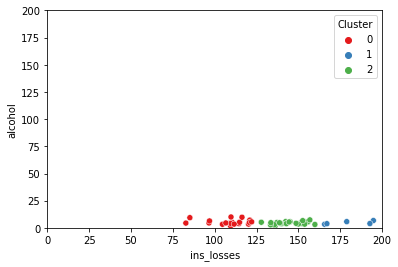

In [105]:
sns.scatterplot(x='ins_losses', y='alcohol', hue= 'Cluster', data=dfsel, palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)

<AxesSubplot:xlabel='ins_losses', ylabel='alcohol'>

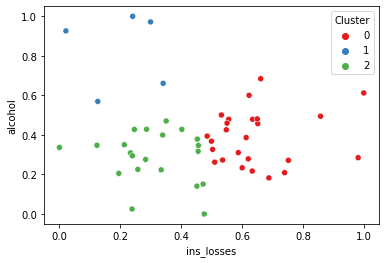

In [107]:
sns.scatterplot(x='ins_losses', y='alcohol', hue= 'Cluster', data=dfselnorm, palette='Set1')
# plt.xlim(0, 200)
# plt.ylim(0, 200)

## Interpretación del Modelo

> ¿Crees que el modelo tiene sentido?
> ¿Qué **variable es más importante** para determinar el grupo?

# Otros Modelos de Análisis de Cluster

> - En la siguiente página web veremos los varios modelos:
> - https://scikit-learn.org/stable/modules/clustering.html

In [108]:
from sklearn.cluster import DBSCAN

In [118]:
db = DBSCAN(eps=0.1)

In [119]:
db.fit(X=dfnorm)

DBSCAN(eps=0.1)

<AxesSubplot:xlabel='ins_losses', ylabel='alcohol'>

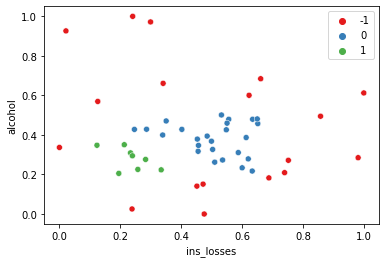

In [120]:
sns.scatterplot(x='ins_losses', y='alcohol', hue= db.labels_, data=dfselnorm, palette='Set1')
# plt.xlim(0, 200)
# plt.ylim(0, 200)

In [123]:
dfnorm['cluster'] = modelnorm.labels_

In [127]:
dfcentroides = dfnorm.groupby(by='cluster').mean()

In [128]:
dfcentroides

,ins_losses,alcohol
cluster,,
0,0.640732,0.387074
1,0.205659,0.825696
2,0.309938,0.289814


In [129]:
dfcentroides.index

Int64Index([0, 1, 2], dtype='int64', name='cluster')

<AxesSubplot:xlabel='ins_losses', ylabel='alcohol'>

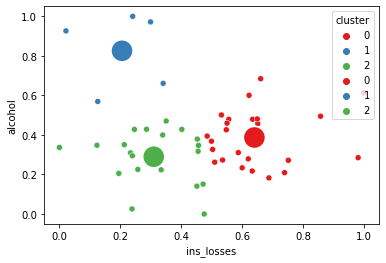

In [131]:
sns.scatterplot(x='ins_losses', y='alcohol', hue= 'cluster', data=dfnorm, palette='Set1')
sns.scatterplot(x='ins_losses', y='alcohol', hue= dfcentroides.index, data=dfcentroides, palette='Set1', s=500)
# plt.xlim(0, 200)
# plt.ylim(0, 200)

<AxesSubplot:xlabel='ins_losses', ylabel='alcohol'>

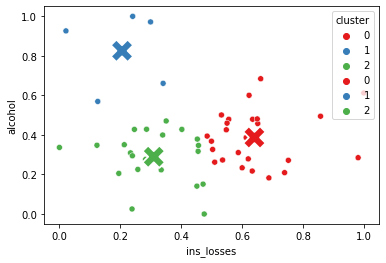

In [132]:
sns.scatterplot(x='ins_losses', y='alcohol', hue= 'cluster', data=dfnorm, palette='Set1')
sns.scatterplot(x='ins_losses', y='alcohol', hue= dfcentroides.index, data=dfcentroides, palette='Set1', s=500, marker='X')
# plt.xlim(0, 200)
# plt.ylim(0, 200)